Xander Fermier
2/15/22
Analyzes Amazon data, specifically
 - Total money
 - Most and least expensive orders, average and median orders
 - How much payed in taxes and effective sales tax rate
 - Spending habits day-by-day in a bar graph

Total Money Spent: $55734.62.
Highest Single Order: $702.54.
Lowest Single Order: $0.97.
Average Spent Per Order: $29.9.
Median Order: $26.74.
Total Spent in Taxes: $2734.12.
Effective Sales Tax Rate: 4.24%.


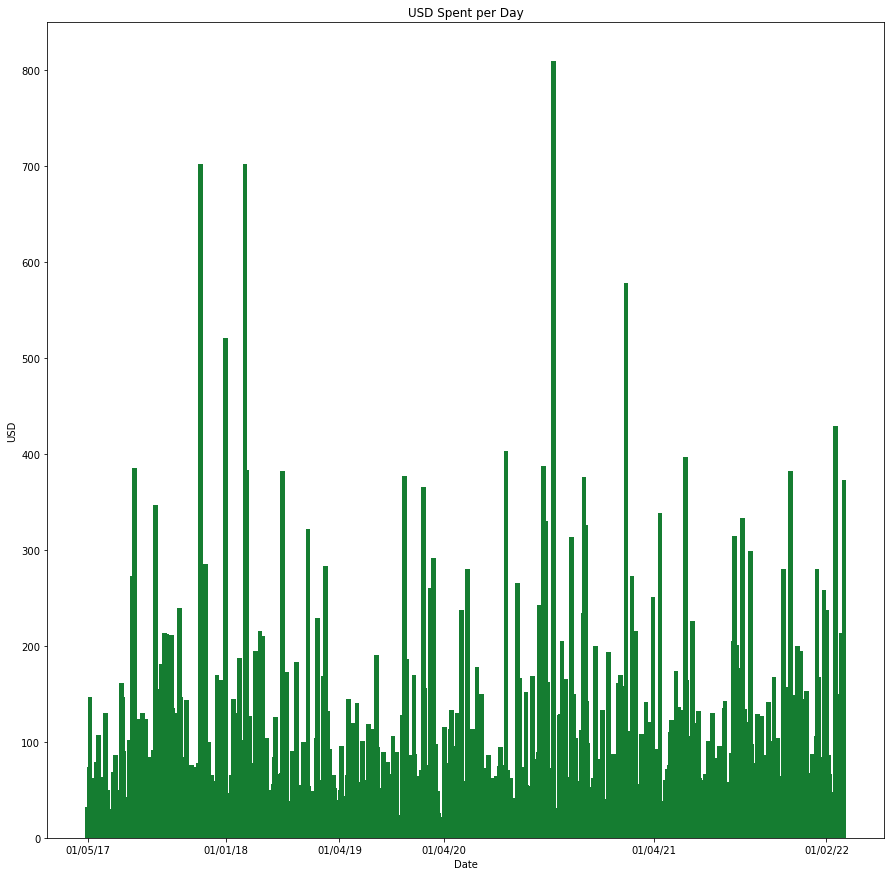

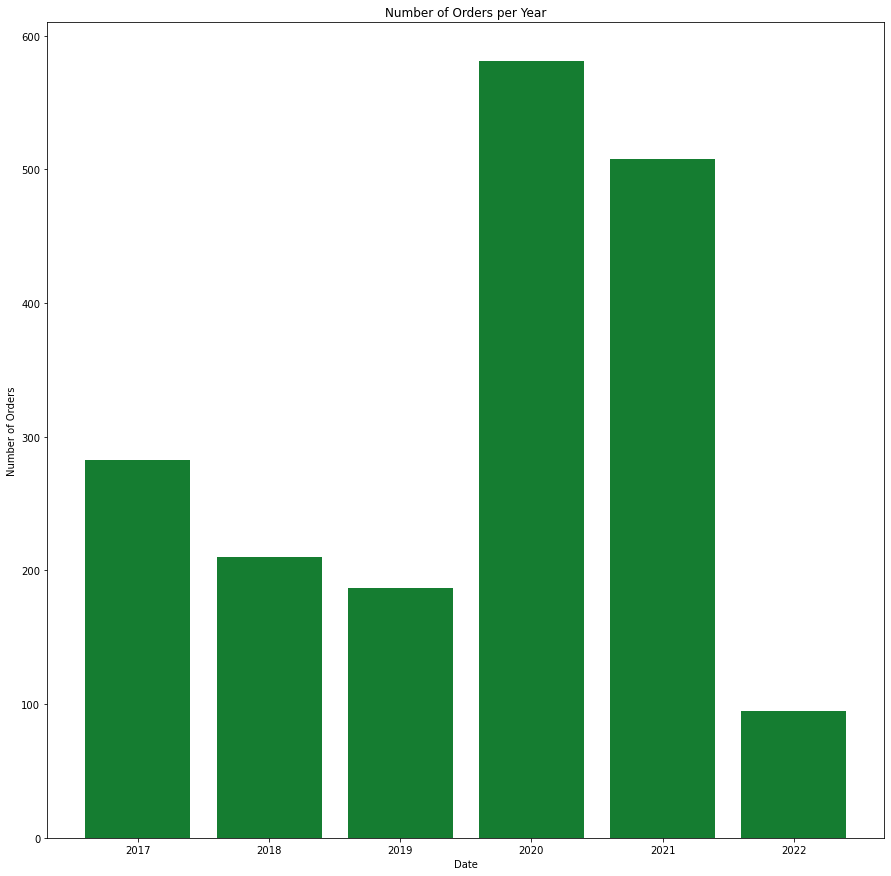

In [17]:
#total money spent
import csv, os
import numpy as np
import matplotlib.pyplot as plt

os.system("cls")

file = open("01-Jan-2017_to_15-Feb-2022.csv", encoding="utf-8")
orderFile = csv.reader(file)
header = next(orderFile)

# colName = []
importantNames = ["Order Date", "List Price Per Unit", "Purchase Price Per Unit", "Quantity", "Item Subtotal", "Item Subtotal Tax", "Item Total"]
importantNamesIndexes = []
uselessNamesIndexes = []

for item in header:
    if item in importantNames:
        importantNamesIndexes.append(header.index(item))
    else:
        uselessNamesIndexes.append(header.index(item))

orderListArray = []

for row in orderFile:
    orderListArray.append(row)

orderListFull = np.asarray(orderListArray)

#removes unnecessary columns
orderList = np.delete(orderListFull, uselessNamesIndexes, 1)

#removes any rows that have $0.0 for total cost
orderList = np.delete(orderList, np.where(orderList[:,importantNames.index("Item Total")] == "$0.00")[0], axis=0)
# print(orderList)

#iterators for the below for loops
counterRow = 0
counterCol = 0

#starting constants
highestOrder = 0.0
lowestOrder = 999999.0
salesTaxRateTotal = 0.0

#used to determine which values to sum up for getting money spent per day
currentDate = orderList[0][0]
prevDate = orderList[0][0]

#stores the amount of money spent for each day
prices = [0.0]

#used for tracking the number of orders pear
currentYear = orderList[0][0]
currentYear = currentYear[6:8]
orderCount = [0]

#iterates through the numpy list to remove "$",find the highest and lowest orders, and get the sales tax rate
for row in orderList:
    currentDate = orderList[counterRow][0]
    if(orderList[counterRow][0][6:8] == currentYear):
        orderCount[len(orderCount)-1] += 1
    else:
        currentYear = orderList[counterRow][0][6:8]
        orderCount.append(1)
    for col in row:
        if "$" in col:
            orderList[counterRow][counterCol] = col.replace("$", "")
            if counterCol == importantNames.index("Item Total"):
                if(float(orderList[counterRow][counterCol]) > float(highestOrder)):
                    highestOrder = orderList[counterRow][counterCol]
                if(float(orderList[counterRow][counterCol]) < float(lowestOrder)):
                    lowestOrder = float(orderList[counterRow][counterCol])
                if(currentDate == prevDate):
                    prices[len(prices)-1] += float(orderList[counterRow][counterCol])
                else:
                    prices.append(float(orderList[counterRow][counterCol]))
                    prevDate = currentDate
        counterCol+=1
    salesTaxRate = float(orderList[counterRow][importantNames.index("Item Subtotal Tax")])/float(orderList[counterRow][importantNames.index("Item Total")]) * 100
    salesTaxRateTotal += salesTaxRate
    counterRow+=1
    counterCol = 0

#ensures formatting for USD
prices = np.round(prices, decimals=2)

salesTaxRateTotal /= np.size(orderList, 0)

#sums up and prints the sum total of all expenses
totalSpent = np.sum(orderList[:,importantNames.index("Item Total")].astype(np.float32))
# print(orderList[:,importantNames.index("Item Total")].astype(np.float32)[0])
print("Total Money Spent: $" + str(round(totalSpent, 2)) + ".")

#prints the highest and lowest cost which is found when removing all of the $ from the prices
print("Highest Single Order: $" + str(highestOrder) + ".")
print("Lowest Single Order: $" + str(lowestOrder) + ".")

#calculates average cost of an order
orderAverage = totalSpent/np.size(orderList, 0)
print("Average Spent Per Order: $" + str(round(orderAverage, 2)) + ".")

#sorts the list by total price spent so that the median can be correctly found
orderListSorted = orderList[np.argsort(orderList[:,importantNames.index("Item Total")])]
orderMedian = orderListSorted[round(np.size(orderList, 0)/2)][importantNames.index("Item Total")]
print("Median Order: $" + str(orderMedian) + ".")

#calculates the amount spent from taxes
totalSpentTaxes = totalSpent = np.sum(orderList[:,importantNames.index("Item Subtotal Tax")].astype(np.float32))
print("Total Spent in Taxes: $" + str(round(totalSpentTaxes, 2)) + ".")

print("Effective Sales Tax Rate: " + str(round(salesTaxRateTotal, 2)) + "%.")

#creates a list of unique dates that preserves the chronological order
datesString = orderList[:,0]
_, datesStringIndexes = np.unique(datesString, return_index=True)
datesString = datesString[np.sort(datesStringIndexes)]
datesStringYears = []
currentYear = datesString[0]
datesStringYears.append(currentYear)
currentYear = currentYear[6:8]
for item in datesString:
    if item[6:8] != currentYear:
        currentYear = item[6:8]
        datesStringYears.append(item)

#formatting for the bar graph
plt.bar(datesString, prices, color="#157d31", width=4)
# plt.xticks(np.arange(0, np.size(datesString), float(np.size(datesString))/5))
plt.xticks(datesStringYears)
plt.title("USD Spent per Day")
plt.xlabel("Date")
plt.ylabel("USD")
bar = plt.gcf()
bar.set_size_inches(15, 15, forward=True)
plt.show()

#graphs the number of orders per year
# print(len(orderCount))
yearString = [2017, 2018, 2019, 2020, 2021, 2022]
# print(len(yearString))
plt.bar(yearString, orderCount, color="#157d31")
# plt.xticks(np.arange(0, np.size(datesString), float(np.size(datesString))/5))
# plt.xticks(yearString)
plt.title("Number of Orders per Year")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
bar2 = plt.gcf()
bar2.set_size_inches(15, 15, forward=True)
plt.show()

This graph gives us insight into both the amount of money spent, as well as the number of order per year. You'll notice that the distance between tickmarks after 2020 is much greater than previous years, which matches what we expected with an increase in number of orders after the pandemic.